In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X = np.array([[1, 1, 1, 1, 1,
               1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 
               0, 5, 10, 1, 2]])

In [3]:
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [4]:
X.shape

(2, 10)

In [5]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

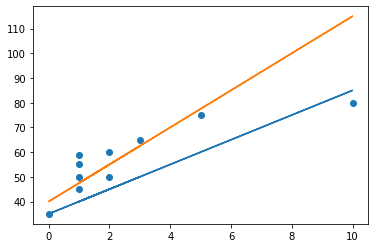

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)

In [7]:
y_pred1 = 35*np.ones(10) + X[1]*5
y_pred2 = 40*np.ones(10) + X[1]*7.5

In [8]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

In [9]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)

In [10]:
err1, err2

(94.0, -21.0)

In [11]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10

In [12]:
mae_1, mae_2

(10.4, 7.9)

In [13]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)

In [14]:
mse_1, mse_2

(143.6, 151.35)

Метод наименьших квадратов

In [15]:
X.shape

(2, 10)

In [16]:
X.T.shape

(10, 2)

In [17]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([47.23214286,  3.91071429])

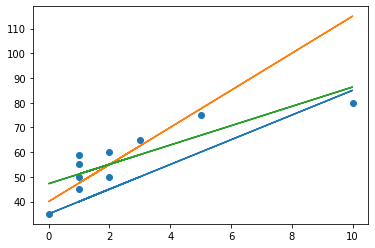

In [18]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)
plt.plot(X[1], W[0] + W[1] * X[1])

In [19]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [20]:
calc_mse(y, y_pred1)

143.6

In [21]:
def calc_mae(y, y_pred):
  err = np.mean(np.abs(y - y_pred))
  return err

In [22]:
calc_mae(y, y_pred1)

10.4

In [23]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [24]:
calc_mse(y, y_pred3)

45.937499999999986

In [25]:
calc_mae(y, y_pred3)

6.182142857142856

Градиентный спуск

In [26]:
alpha = 1e-9
n = 10
f = 1/n * np.sum((y_pred3 - y)**2)

In [27]:
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [28]:
W[0] - g


47.232142877478566

1. Подберите скорость обучения (alpha) и количество итераций:

In [29]:
n = X.shape[1]
alpha = 1e-5
iter_ = 1000000
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 1e-05)

In [30]:
for i in range(iter_):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)

    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % 100 == 0:
        print(i, W, err)

0 [1.001102 0.5034  ] 3173.15
100 [1.11030755 0.83814941] 3049.1025771214545
200 [1.21758227 1.16270929] 2932.194959811977
300 [1.32298218 1.47738267] 2822.009397496786
400 [1.42656161 1.78246357] 2718.1525965976502
500 [1.5283733  2.07823728] 2620.2542886804813
600 [1.62846841 2.3649806 ] 2527.9658824318126
700 [1.72689659 2.64296212] 2440.9591945563498
800 [1.82370602 2.91244245] 2358.9252549750754
900 [1.91894343 3.17367443] 2281.5731819739544
1000 [2.01265419 3.42690342] 2208.6291232079006
1100 [2.10488229 3.67236746] 2139.835258704477
1200 [2.19567045 3.91029754] 2074.948862237505
1300 [2.2850601  4.14091778] 2013.7414176532627
1400 [2.37309145 4.36444563] 1955.9977869320405
1500 [2.4598035  4.58109208] 1901.5154269561663
1600 [2.54523412 4.79106186] 1850.1036521329365
1700 [2.62942003 4.99455362] 1801.582940187852
1800 [2.71239687 5.19176008] 1755.7842786007145
1900 [2.79419923 5.38286827] 1712.54854930512
2000 [2.87486067 5.56805964] 1671.7259494111815
2100 [2.95441374 5.7475102

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [31]:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
    if i % 100 == 0:
        print(i, W, err)

0 [47.23079796  3.91096265] 45.937500972434805
100 [47.23079907  3.91096376] 45.937500971187156
200 [47.23080015  3.91096483] 45.937500970039125
300 [47.23080117  3.91096586] 45.93750096898275
400 [47.23080216  3.91096685] 45.93750096801075
500 [47.2308031   3.91096779] 45.93750096711633
600 [47.23080401  3.9109687 ] 45.937500966293356
700 [47.23080488  3.91096957] 45.9375009655361
800 [47.23080571  3.9109704 ] 45.9375009648393
900 [47.23080652  3.9109712 ] 45.93750096419813
